<a href="https://colab.research.google.com/github/Nandini37/Nandini37/blob/main/Model_Selection_and_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model Selection and Accuracy Testing

Here we would be considering Iris Dataset and train model to check algorithm with maximum accuracy

Attribute Information:

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:
-- Iris Setosa
-- Iris Versicolour
-- Iris Virginica

## Importing Data

In [1]:
import numpy as np
import pandas as pd

In [2]:
print('numpy:{}'.format(np.__version__))
print('Pandas:{}'.format(pd.__version__))

numpy:1.21.6
Pandas:1.3.5


In [3]:
#importing data
df = pd.read_csv("/content/iris.csv")

In [4]:
df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal Length  150 non-null    float64
 1   Sepal Width   150 non-null    float64
 2   Petal Length  150 non-null    float64
 3   Petal Width   150 non-null    float64
 4   Class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
# Checking Null values
df.isnull().sum()*100/df.shape[0]

Sepal Length    0.0
Sepal Width     0.0
Petal Length    0.0
Petal Width     0.0
Class           0.0
dtype: float64

In [7]:
#Checking duplicated values

df.duplicated(subset=['Class']).sum()*100/df.shape[0]

98.0

In [8]:
#Checking duplicated value for column

df.duplicated(subset=['Class'])

0      False
1       True
2       True
3       True
4       True
       ...  
145     True
146     True
147     True
148     True
149     True
Length: 150, dtype: bool

In [9]:
#checking value counts for each class

df['Class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Class, dtype: int64

In [10]:
df.describe()

,Sepal Length,Sepal Width,Petal Length,Petal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
df_copy = df.copy()

In [12]:
df.shape

(150, 5)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal Length  150 non-null    float64
 1   Sepal Width   150 non-null    float64
 2   Petal Length  150 non-null    float64
 3   Petal Width   150 non-null    float64
 4   Class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Importing Data Visualization Librabry

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

import plotly as py
import plotly.graph_objs as go

import warnings
warnings.filterwarnings('ignore')

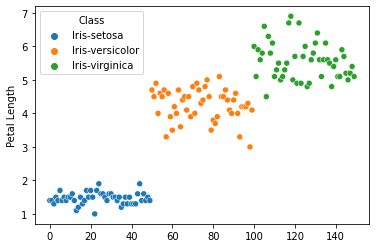

In [15]:
#Scatterplot

#Classifying flowers by Petal Length

fig = sns.scatterplot(x=df.index,y=df['Petal Length'],hue=df['Class'])

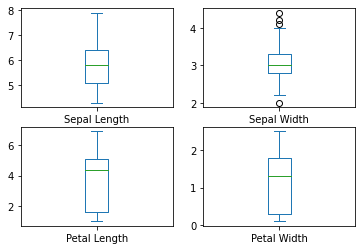

In [16]:
#Plotting boxplot for entire dataset

df.plot(kind = 'box' , subplots = True, layout = (2,2), sharex = False , sharey = False)
plt.show()

{'boxes': [<matplotlib.lines.Line2D at 0x7f49eddb6b10>],
 'caps': [<matplotlib.lines.Line2D at 0x7f49eddbeb50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f49eddc6b90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f49eddc6650>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f49eddbe0d0>,
  <matplotlib.lines.Line2D at 0x7f49eddbe610>]}

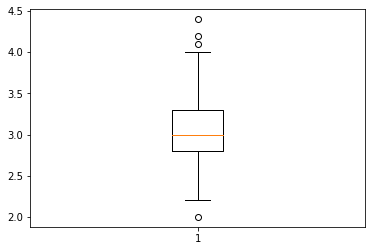

In [17]:
#plot Boxplot

plt.boxplot(df["Sepal Width"])

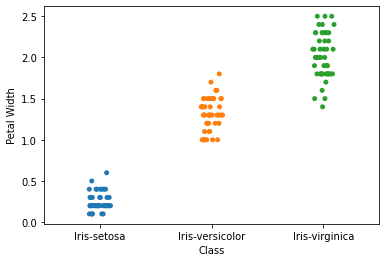

In [18]:
sns.stripplot(x = df["Class"], y = df["Petal Width"])



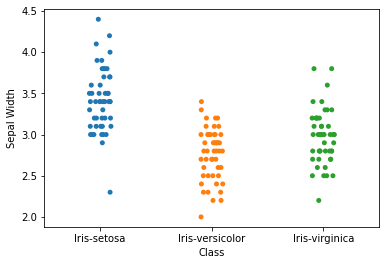

In [19]:
sns.stripplot(x = df["Class"], y = df["Sepal Width"])

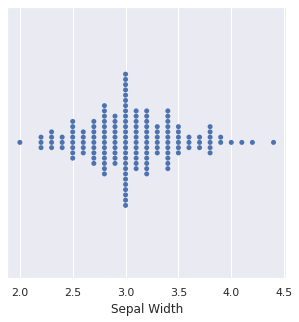

In [20]:
sns.set(rc ={'figure.figsize':(5,5)})
sns.swarmplot(x = df["Sepal Width"])

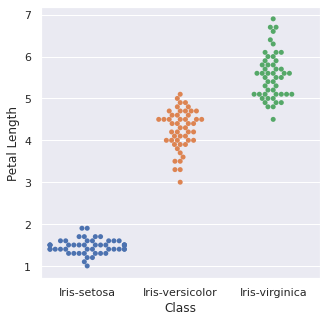

In [21]:
#Swarplot for Petal length

sns.set(rc ={'figure.figsize':(5,5)})
sns.swarmplot(x = df["Class"], y = df['Petal Length'])

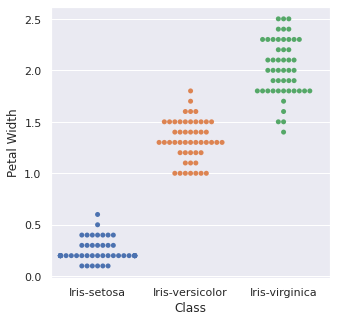

In [22]:
#Swarplot for Petal Width

sns.set(rc ={'figure.figsize':(5,5)})
sns.swarmplot(x = df["Class"], y = df['Petal Width'])

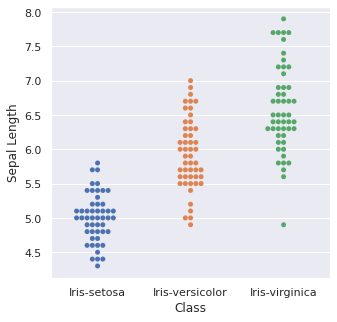

In [23]:
#Swarplot for Sepal length

sns.set(rc ={'figure.figsize':(5,5)})
sns.swarmplot(x = df["Class"], y = df['Sepal Length'])

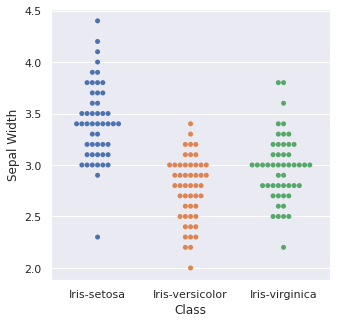

In [24]:
#Swarplot for Sepal Width

sns.set(rc ={'figure.figsize':(5,5)})
sns.swarmplot(x = df["Class"], y = df['Sepal Width'])

In [25]:
#from pandas.plotting import scatter_matrix
#scatter_matrix(df)
#plt.show()

### Insight from Data visualization

From above charts we gain the following insight for three flowers: 

* Iris-setosa: It has small petal lenth and width. However its sepal are short and wider compared to others
* Iris-Versicolor: Versicolor has medium size petal length and its width. Also, its sepal lenth is medium/ Its,Sepal width is thin capared to others 
* Iris-Virginica: From above observation, we could say that Virginica has long and wide petals. However, its sepals are long and narrow.


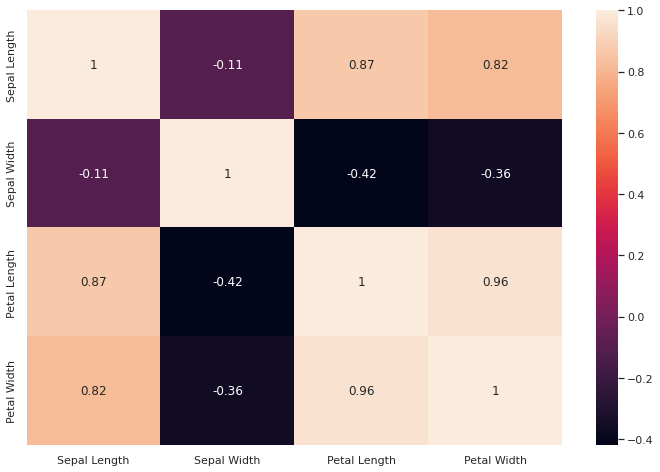

In [26]:
plt.figure(figsize=(12,8))
ax = sns.heatmap(df.corr(),annot = True)
plt.show()

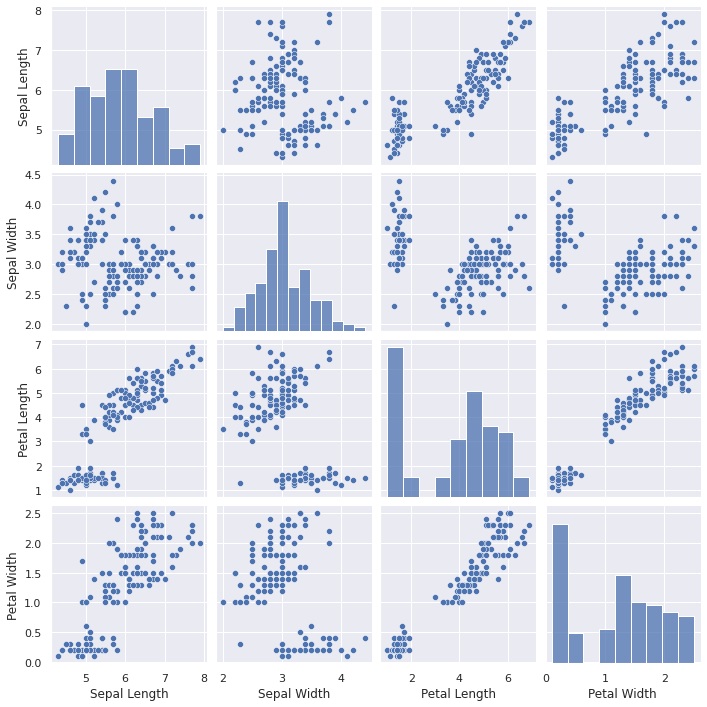

In [27]:
sns.pairplot(df)
plt.show()

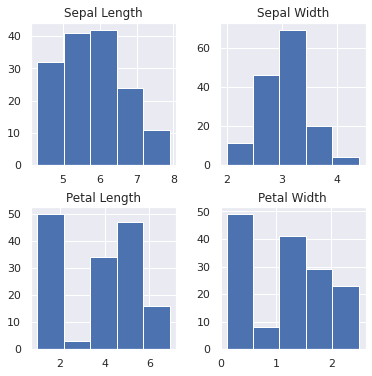

In [28]:
plt.rcParams["figure.figsize"] = (6,6)
df.hist(bins=5)
plt.show()

# Checking the right alogorithm for above data



In [29]:
#load libraries

from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


In [30]:
#Creating training dataset

array = df.values

X = array[:,0:4]
Y = array[:,4]

validation_size = 0.20
seed = 6

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,Y, test_size = validation_size, random_state = seed)
                                                                  
                                                            

In [31]:
#test harness

seed = 6
scoring = 'accuracy'

In [32]:
import warnings
warnings.filterwarnings('ignore')

#ignore warnings

In [33]:
#checking algorithms

models =[]
models.append(('Logistic Regression' , LogisticRegression()))
models.append(('Linear Discrimination Analysis' , LinearDiscriminantAnalysis()))
models.append(('KNN' , KNeighborsClassifier()))
models.append(('Decision Tree Classifier' , LogisticRegression()))
models.append(('Navies Bayes' , GaussianNB()))
models.append(('Vector machine' , SVC()))

results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits= 10, random_state= seed, shuffle=True)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv = kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name,cv_results.mean(), cv_results.std())
    print(msg)

Logistic Regression: 0.958333 (0.041667)
Linear Discrimination Analysis: 0.975000 (0.038188)
KNN: 0.958333 (0.041667)
Decision Tree Classifier: 0.958333 (0.041667)
Navies Bayes: 0.966667 (0.040825)
Vector machine: 0.941667 (0.053359)


#Conclusion:
<br>
**Hence from above interpretation, we conclude that Linear Discrimination Analysis has maximum acuracy of 97%**

refrence links:
* Univarate charts: https://www.analyticsvidhya.com/blog/2020/07/univariate-analysis-visualization-with-illustrations-in-python/
<br>
* Matplotlib Library : https://matplotlib.org/stable/plot_types/index.html
* SnS Librabry https://seaborn.pydata.org/tutorial/relational.html
